# Homework 2

Visualize, describe, and model distributions

Allen Downey

[MIT License](https://en.wikipedia.org/wiki/MIT_License)

In [149]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

from utils import decorate
from thinkstats2 import Pmf, Cdf

import thinkstats2
import thinkplot

Here are some of the functions from Chapter 5.

In [150]:
def MakeNormalModel(values, label=''):
    """Plots a CDF with a Normal model.

    values: sequence
    """
    cdf = thinkstats2.Cdf(values, label=label)

    mean, var = thinkstats2.TrimmedMeanVar(values)
    std = np.sqrt(var)
    print('n, mean, std', len(values), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)

In [151]:
def MakeNormalPlot(values, label=''):
    """Generates a normal probability plot.

    values: sequence
    """
    mean, var = thinkstats2.TrimmedMeanVar(values, p=0.01)
    std = np.sqrt(var)

    xs = [-5, 5]
    xs, ys = thinkstats2.FitLine(xs, mean, std)
    thinkplot.Plot(xs, ys, color='0.8', label='model')

    xs, ys = thinkstats2.NormalProbability(values)
    thinkplot.Plot(xs, ys, label=label)

Read the GSS data again.

In [152]:
%time gss = pd.read_hdf('gss.hdf5', 'gss')
gss.shape

Wall time: 40.9 ms


(62466, 101)

In [153]:
gss.head()

,year,id_,agewed,divorce,sibs,childs,age,educ,paeduc,maeduc,...,memchurh,realinc,cohort,marcohrt,ballot,wtssall,adults,compuse,databank,wtssnr
0,1972,167,0,0,2,0,26.0,18.0,12,12,...,0,13537.0,1946.0,0,0,0.8893,2.0,0,0,1.0
1,1972,1256,30,2,0,1,38.0,12.0,97,99,...,0,18951.0,1934.0,1964,0,0.4446,1.0,0,0,1.0
2,1972,415,0,0,7,0,57.0,12.0,7,7,...,0,30458.0,1915.0,0,0,1.3339,3.0,0,0,1.0
3,1972,234,18,1,6,3,61.0,14.0,8,5,...,0,37226.0,1911.0,1929,0,0.8893,2.0,0,0,1.0
4,1972,554,22,2,3,3,59.0,12.0,6,11,...,0,30458.0,1913.0,1935,0,0.8893,2.0,0,0,1.0


Most variables use special codes to indicate missing data.  We have to be careful not to use these codes as numerical data; one way to manage that is to replace them with `NaN`, which Pandas recognizes as a missing value.

In [154]:
def replace_invalid(df):
    df.realinc.replace([0], np.nan, inplace=True)                  
    df.educ.replace([98,99], np.nan, inplace=True)
    # 89 means 89 or older
    df.age.replace([98, 99], np.nan, inplace=True) 
    df.cohort.replace([9999], np.nan, inplace=True)
    df.adults.replace([9], np.nan, inplace=True)

replace_invalid(gss)

### Distribution of age

Here's the CDF of ages.

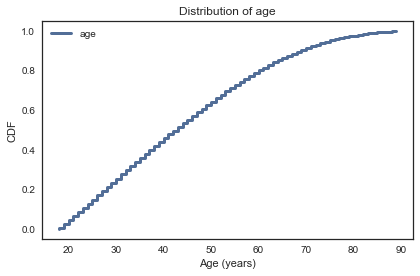

In [155]:
cdf_age = Cdf(gss.age)
thinkplot.cdf(cdf_age, label='age')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='CDF')

**Exercise**:  Each of the following cells shows the distribution of ages under various transforms, compared to various models.  In each text cell, add a sentence or two that interprets the result.  What can we say about the distribution of ages based on each figure?

1) Here's the CDF of ages compared to a normal distribution with the same mean and standard deviation.

Interpretation: There is a narrow range of ages that does not do well with the infinite tails of the normal distribution. 
The outliers are not captured well, as demonstrated by the edges deviating slightly. This is still a decently good match.


n, mean, std 62281 44.47905368874617 16.482037485675978


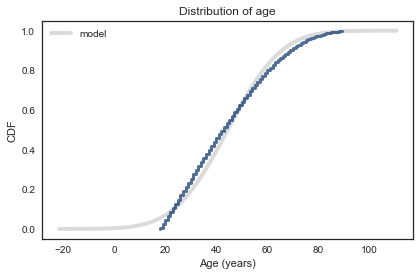

In [156]:
MakeNormalModel(gss.age.dropna(), label='')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='CDF')


2) Here's a normal probability plot for the distribution of ages.

Interpretation: This is a great fit in the middle, but for the extremes in either direction this would be best represented by another distribution.

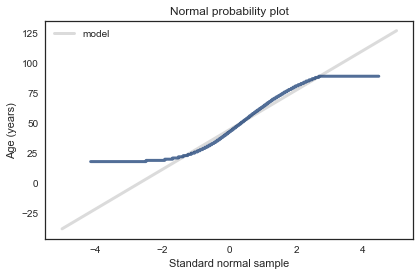

In [157]:
MakeNormalPlot(gss.age.dropna(), label='')

decorate(title='Normal probability plot', 
         xlabel='Standard normal sample', 
         ylabel='Age (years)')


3) Here's the complementary CDF on a log-y scale.

Interpretation: If the data were to approximate an exponential distribution, the trajectory would more or less look like a straight line. This rules out the exponential model as a good fit for this data.

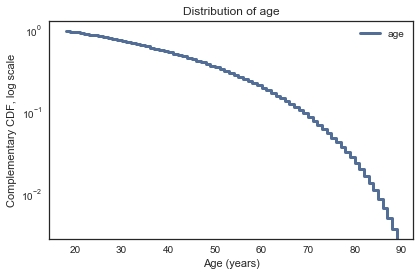

In [158]:
thinkplot.cdf(cdf_age, label='age', complement=True)

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='Complementary CDF, log scale',
         yscale='log')


4) Here's the CDF of ages on a log-x scale.

Interpretation: This data is closer to a straight line, but has curved tails. This resembles a sigmoid, so the data could be modeled by a lognormal distribution, but due to the long left tail, there may be a better model.

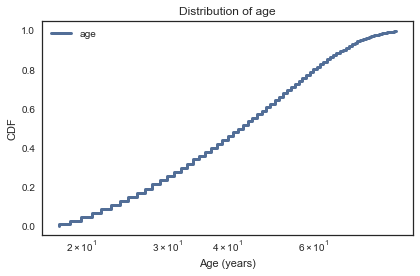

In [159]:
thinkplot.cdf(cdf_age, label='age')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='CDF',
         xscale='log')


5) Here's the CDF of the logarithm of ages, compared to a normal model.

Interpretation: The shape is similar between the models, but the data is closer to a straight line than the model, meaning lognormal is an ok candidate, but normal still may be better (especially in the middle).

n, mean, std 62281 1.6168744157503179 0.1678791432891677


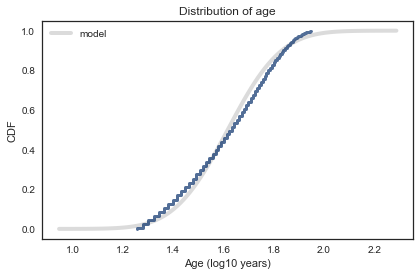

In [163]:
values = np.log10(gss.age.dropna())
MakeNormalModel(values, label='')

decorate(title='Distribution of age', 
         xlabel='Age (log10 years)', 
         ylabel='CDF')

6) Here's a normal probability plot for the logarithm of ages.

Interpretation: Yet again, this fits in the middle well, but portions of the edges deviates from the edges. The right tale deviates more here in the lognormal model than in the normal model, suggesting normal as a better distribution for high income representation.

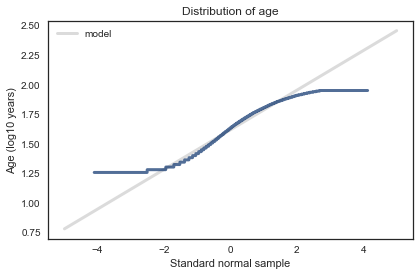

In [164]:
MakeNormalPlot(values, label='')

decorate(title='Distribution of age', 
         xlabel='Standard normal sample', 
         ylabel='Age (log10 years)')

7) Here's the complementary CDF on a log-log scale.

Interpretation: If this were straight, it would be a good match for a Pareto distribution. Since it is curved, this is ruled out.

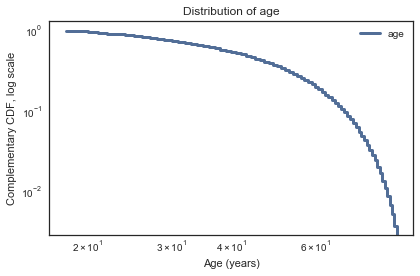

In [165]:
thinkplot.cdf(cdf_age, label='age', complement=True)

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='Complementary CDF, log scale',
         xscale='log',
         yscale='log')

8) Here's a test to see whether ages are well-modeled by a Weibull distribution.

Interpretation: This would be a straight line if it were a good match for the Weibull distribution. This is the deciding factor between Weibull and lognormal. Lognormal is not perfect but it is a much better match than Weibull.

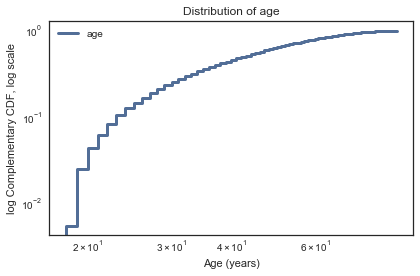

In [166]:
thinkplot.cdf(cdf_age, label='age', transform='Weibull')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='log Complementary CDF, log scale',
         xscale='log',
         yscale='log')

### Distribution of income

Here's the CDF of `realinc`.

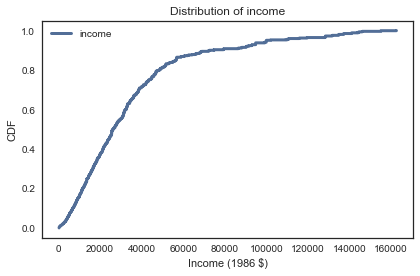

In [16]:
cdf_realinc = Cdf(gss.realinc)
thinkplot.cdf(cdf_realinc, label='income')

decorate(title='Distribution of income', 
         xlabel='Income (1986 $)', 
         ylabel='CDF')

**Exercise:** Use visualizations like the ones in the previous exercise to see whether there is an analytic model that describes the distribution of `gss.realinc` well.

2) Here's a normal probability plot for the values. The is virtually no overlap, making the normal model a bad candidate.

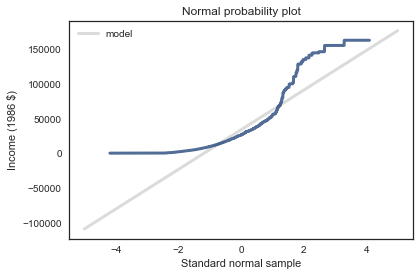

In [28]:
MakeNormalPlot(gss.realinc.dropna(), label='')

decorate(title='Normal probability plot', 
         xlabel='Standard normal sample', 
         ylabel='Income (1986 $)')

3) Here's the complementary CDF on a log-y scale. The lower incomes are well represented by the straight line, but the rest is too curved. This means that the lowest incomes could be represented by an exponential distribution.

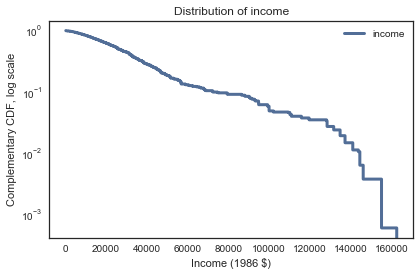

In [27]:
cdf_inc = Cdf(gss.realinc)

thinkplot.cdf(cdf_inc, label='income', complement=True)

decorate(title='Distribution of income', 
         xlabel='Income (1986 $)', 
         ylabel='Complementary CDF, log scale',
         yscale='log')

4) Here's the CDF on a log-x scale. This looks somewhat like a sigmoid, so lognormal may be a candidate.

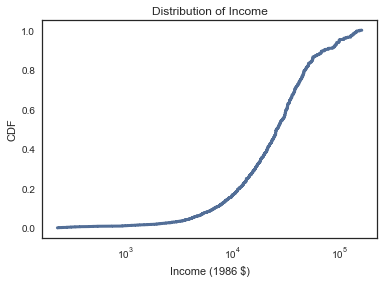

In [26]:
thinkplot.Cdf(cdf_inc) 
thinkplot.Show(title = 'Distribution of Income', xlabel='Income (1986 $)', ylabel='CDF', xscale='log')


5) Here's the CDF of the logarithm of the values, compared to a normal model. This is similar in shape, meaning that it could very well be represented by a lognormal distribution. However, the lognormal distribution continues beyond negative income and deviates in the lower income sections, meaning it would be better suited for the exponential model.

n, mean, std 55499 33882.52181307481 28502.895120969337


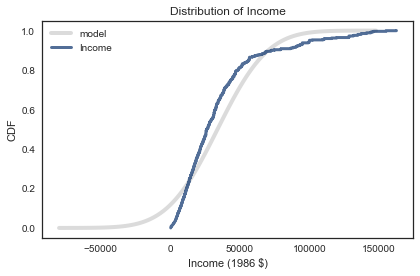

In [34]:
MakeNormalModel(gss.realinc.dropna(), label='Income')
decorate(title = 'Distribution of Income', ylabel = 'CDF', xlabel = 'Income (1986 $)')

6) Here's a normal probability plot for the logarithm of the values.
This representation makes the fit to the lognormal model even more clear as a good candidate.

n, mean, std 55499 4.381031736514132 0.3856600273208647


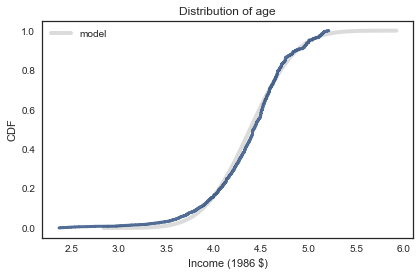

In [37]:
values = np.log10(gss.realinc.dropna())
MakeNormalModel(values, label='')

decorate(title='Distribution of age', 
         xlabel='Income (1986 $)', 
         ylabel='CDF')

7) Here's the complementary CDF on a log-log scale. The curve makes this a bad candidate for the Pareto distribution.

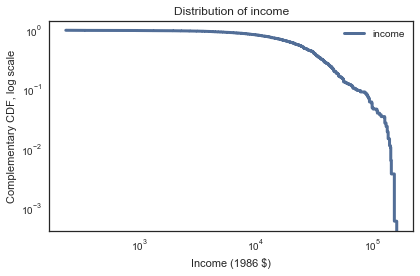

In [39]:
thinkplot.cdf(cdf_inc, label='income', complement=True)

decorate(title='Distribution of income', 
         xlabel='Income (1986 $)', 
         ylabel='Complementary CDF, log scale',
         xscale='log',
         yscale='log')

8) Here's a test to see whether the values are well-modeled by a Weibull distribution.

Interpretation: The middle is well represented by the Weibull distribution, but the edges deviate significantly.

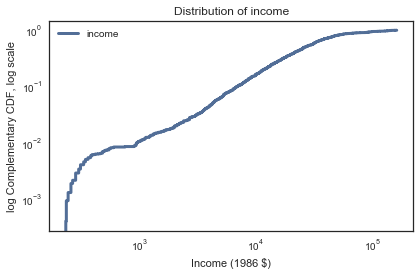

In [40]:
thinkplot.cdf(cdf_inc, label='income', transform='Weibull')

decorate(title='Distribution of income', 
         xlabel='Income (1986 $)', 
         ylabel='log Complementary CDF, log scale',
         xscale='log',
         yscale='log')

## BRFSS


In [41]:
%time brfss = pd.read_hdf('brfss.hdf5', 'brfss')
brfss.head()

Wall time: 18 ms


,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,46.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,83.0
57312,2.0,163.0,72.57,8.0,390.248599,5.0,43.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,30.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,30.0


Let's look at the distribution of height in the BRFSS dataset.  Here's the CDF.

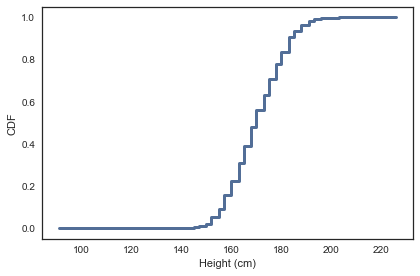

In [42]:
heights = brfss.HTM4

cdf_heights = Cdf(heights)
thinkplot.Cdf(cdf_heights)

decorate(xlabel='Height (cm)', ylabel='CDF')

To see whether a normal model describes this data well, we can use KDE to estimate the PDF.

In [43]:
from scipy.stats import gaussian_kde

Here's an example using the default bandwidth method.

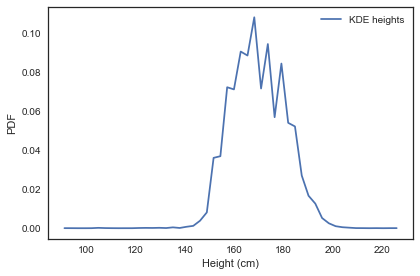

In [47]:
kde = gaussian_kde(heights.dropna())

xs = np.linspace(heights.min(), heights.max())
ds = kde.evaluate(xs)
ds /= ds.sum()

plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Height (cm)', ylabel='PDF')

It doesn't work very well; we can improve it by overriding the bandwidth with a constant.

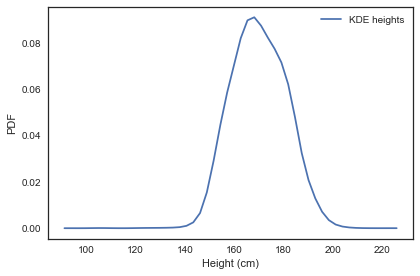

In [48]:
kde = gaussian_kde(heights.dropna(), bw_method=0.3)

ds = kde.evaluate(xs)
ds /= ds.sum()

plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Height (cm)', ylabel='PDF')

Now we can generate a normal model with the same mean and standard deviation.

In [49]:
mean = heights.mean()
std = heights.std()

mean, std

(170.09044280714292, 10.795080237191893)

Here's the model compared to the estimated PDF.

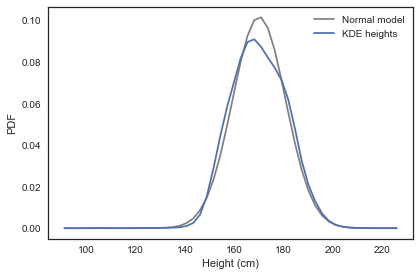

In [50]:
normal_pdf = thinkstats2.NormalPdf(mean, std)

ps = normal_pdf.Density(xs)
ps /= ps.sum()

plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Height (cm)', ylabel='PDF')

The data don't fit the model particularly well, possibly because the distribution of heights is a mixture of two distributions, for men and women.

**Exercise:** Generate a similar figure for just women's heights and see if the normal model does any better.

It does significantly better!

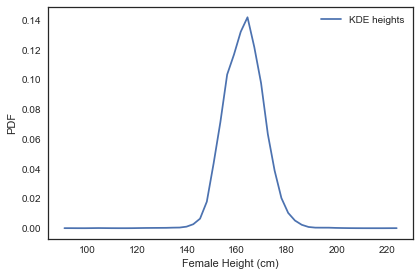

In [167]:
femhgt = brfss.loc[brfss.SEX == 2, 'HTM4']
xs = np.linspace(femhgt.min(), femhgt.max())
kde = gaussian_kde(femhgt.dropna(), bw_method=0.3)
ds = kde.evaluate(xs)
ds /= ds.sum()

plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Female Height (cm)', ylabel='PDF')

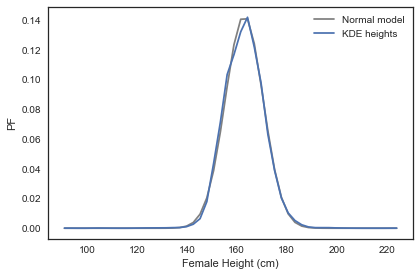

In [168]:
mean = femhgt.mean()
std = femhgt.std()
normal_pdf = thinkstats2.NormalPdf(mean,std)
ps = normal_pdf.Density(xs)
ps /= ps.sum()

plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Female Height (cm)', ylabel = 'PF')

**Exercise:** Generate a similar figure for men's weights, `brfss.WTKG3`.  How well does the normal model fit?

The normal model underestimates low and slightly high weights, but overestimates average and very high weights.

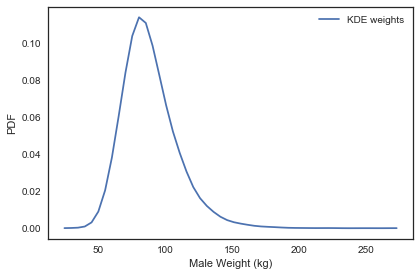

In [169]:
mwgt = brfss.loc[brfss.SEX == 1, 'WTKG3']
xs = np.linspace(mwgt.min(), mwgt.max())
kde = gaussian_kde(mwgt.dropna(), bw_method=0.3)
ds = kde.evaluate(xs)
ds /= ds.sum()

plt.plot(xs, ds, label='KDE weights')

decorate(xlabel='Male Weight (kg)', ylabel='PDF')

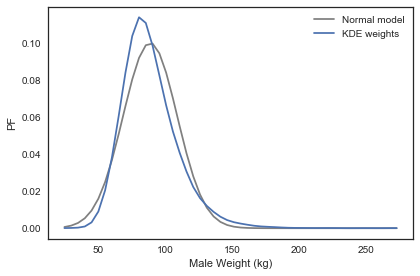

In [170]:
mean = mwgt.mean()
std = mwgt.std()
normal_pdf = thinkstats2.NormalPdf(mean,std)
ps = normal_pdf.Density(xs)
ps /= ps.sum()

plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE weights')

decorate(xlabel='Male Weight (kg)', ylabel = 'PF')

**Exercise:** Try it one more time with the log of men's weights.  How well does the normal model fit?  What does that imply about the distribution of weight?

This fits much more closely, implying a lognormal distribution.

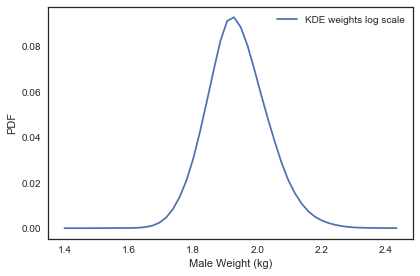

In [103]:
lmwgt = np.log10(mwgt)
xs = np.linspace(lmwgt.min(), lmwgt.max())
kde = gaussian_kde(lmwgt.dropna(), bw_method=0.3)
ds = kde.evaluate(xs)
ds /= ds.sum()

plt.plot(xs, ds, label='KDE weights log scale')

decorate(xlabel='Male Weight (kg)', ylabel='PDF')

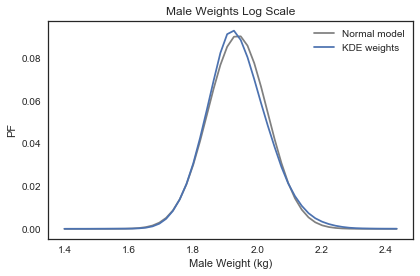

In [104]:
mean = lmwgt.mean()
std = lmwgt.std()
normal_pdf = thinkstats2.NormalPdf(mean,std)
ps = normal_pdf.Density(xs)
ps /= ps.sum()

plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE weights')

decorate(title = 'Male Weights Log Scale',
         xlabel='Male Weight (kg)', ylabel = 'PF')

## Skewness

Let's look at the skewness of the distribution of weights for men and women.

In [105]:
male = (brfss.SEX == 1)
male_weights = brfss.loc[male, 'WTKG3']

In [106]:
female = (brfss.SEX == 2)
female_weights = brfss.loc[female, 'WTKG3']

As we've seen, these distributions are skewed to the right, so we expect the mean to be higher than the median. 

In [107]:
male_weights.mean(), male_weights.median()

(88.83871202340993, 86.18)

We can compute the moment-based sample skewness using Pandas or `thinkstats2`.  The results are almost the same.

In [108]:
male_weights.skew(), thinkstats2.Skewness(male_weights.dropna())

(1.2607915291363547, 1.2607508370740947)

But moment-based sample skewness is a terrible statistic!  A more robust alternative is Pearson's median skewness:

In [109]:
thinkstats2.PearsonMedianSkewness(male_weights.dropna())

0.3961356157532533

**Exercise:** Compute the same statistics for women.  Which distribution is more skewed?

The female distribution is more skewed

In [110]:
female_weights.mean(), female_weights.median()

(73.62438714355793, 70.31)

In [111]:
female_weights.skew(), thinkstats2.Skewness(female_weights.dropna())

(1.3693028811523575, 1.3692590742841042)

In [113]:
thinkstats2.PearsonMedianSkewness(female_weights.dropna())

0.5268415056705406

**Exercise:** Explore the GSS or BRFSS dataset and find something interesting!

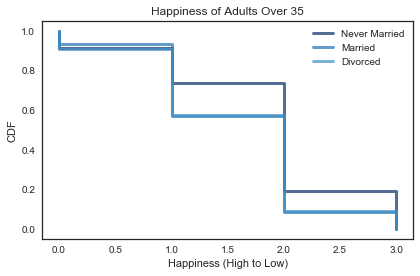

In [148]:
happiness = gss.happy < 4
age = gss.age > 35
divorced = gss.loc[gss.divorce == 1]
divorced = divorced.loc[age]
married = gss.loc[gss.divorce == 2]
married = married.loc[age]
nevermarried = gss.loc[gss.divorce == 0]
nevermarried = nevermarried.loc[age]
dcdf = Cdf(divorced.loc[happiness, 'happy'])
mcdf = Cdf(married.loc[happiness, 'happy'])
ncdf = Cdf(nevermarried.loc[happiness, 'happy'])


thinkplot.cdf(ncdf, label='Never Married', complement=True)
thinkplot.cdf(mcdf, label='Married', complement=True)
thinkplot.cdf(dcdf, label='Divorced', complement=True)
decorate(title = 'Happiness of Adults Over 35',
        xlabel = 'Happiness (High to Low)',
        ylabel = 'CDF')

Having been married is more important than staying married to adult happiness, being divorced makes a marginal difference in liklihood of lower scores, but never having been married creates a significant increase of 2s and 3s.